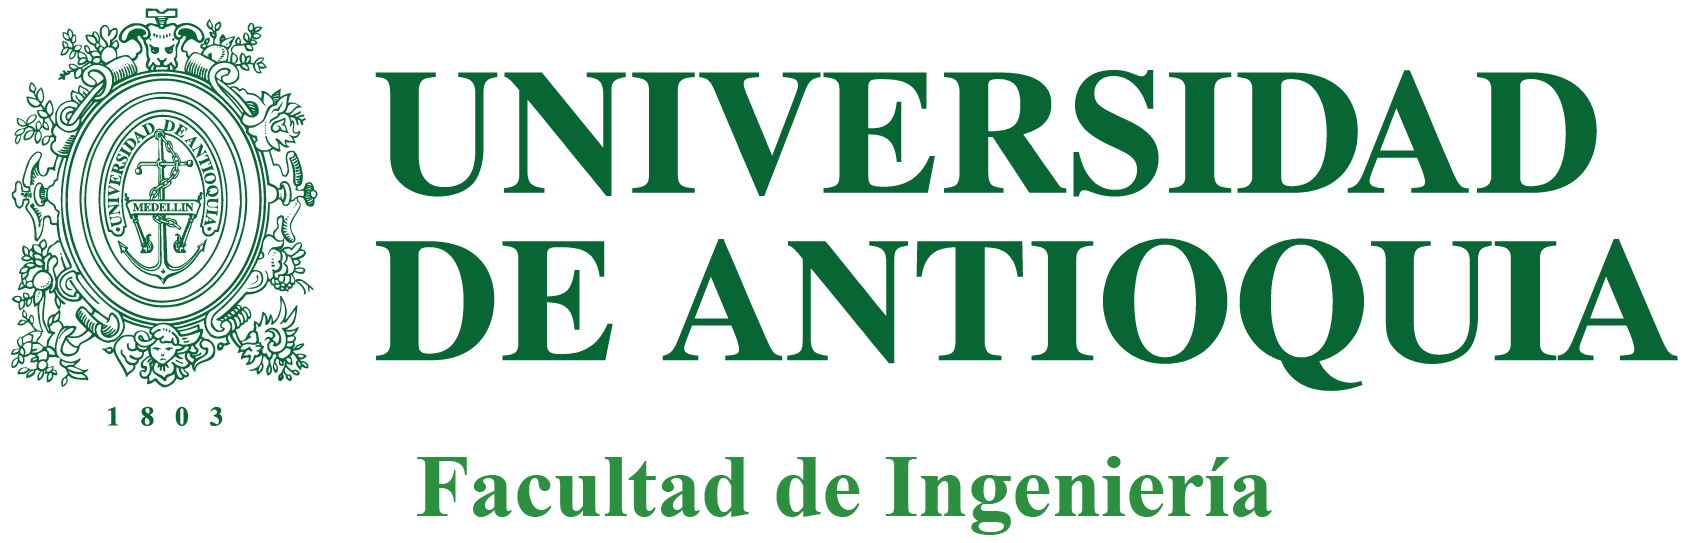


# <font color='2d9040'>**Identificación aplicando técnicas paramétricas.**</font>
**Estudiantes:**
- Elisabeth Gomez Cano.
- Marly Alejandra Ortega Andrade.
- Juan Esteban Pineda Lopera.

**Objetivo:** *Realizar un acercamiento a los conceptos fundamentales en el análisis frecuencial de señales, y su aplicación en el análisis de bioseñales.*

## Importando las librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import welch

## Punto 4.1
---
Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente. (10%)



Aunque el teorema de Nyquist establece que la frecuencia de muestreo mínima debe ser el doble de la frecuencia más alta presente en la señal, en la práctica esta tasa resulta insuficiente para representar adecuadamente la forma de la onda. Esto se debe a que se están tomando solo dos muestras por ciclo de la señal de mayor frecuencia, con lo que no es posible capturar con precisión la forma sinusoidal ni sus variaciones de fase o amplitud. Por esta razón, se recomienda utilizar una frecuencia de muestreo al menos 10 veces mayor que la frecuencia más alta de interés, lo que garantiza una mayor cantidad de datos por ciclo y, por tanto, una reconstrucción más fiel y visualmente clara de la señales.[1]

In [ ]:
Fs = 160*10 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
A = 1

# Define a common time array for a longer duration
duration = 0.1 # seconds, adjust as needed
t = np.arange(0, duration, T)

# Señal de 40Hz
Fo1 = 40 # Frecuencia fundamental de la señal
x1 = A*np.sin(2*np.pi*Fo1*t)

# Señal de 80Hz
Fo2 = 80 # Frecuencia fundamental de la señal
x2 = A*np.sin(2*np.pi*Fo2*t)

# Señal de 160Hz
Fo3 = 160 # Frecuencia fundamental de la señal
x3 = A*np.sin(2*np.pi*Fo3*t)

x = x1 + x2 + x3

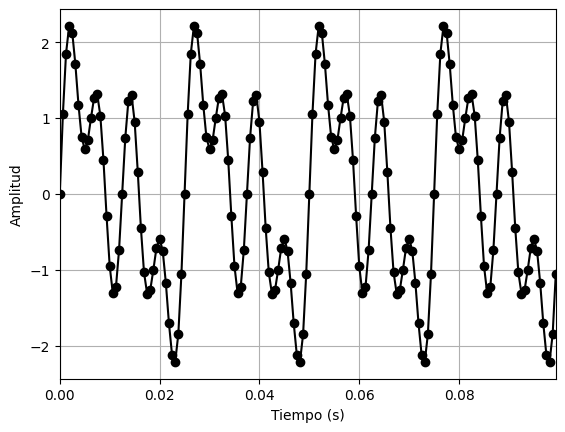

In [ ]:
plt.plot(t, x, marker='o', color='black')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.xlim(np.min(t), np.max(t))
plt.show()

## Punto 4.2
---
 Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal). (10%)

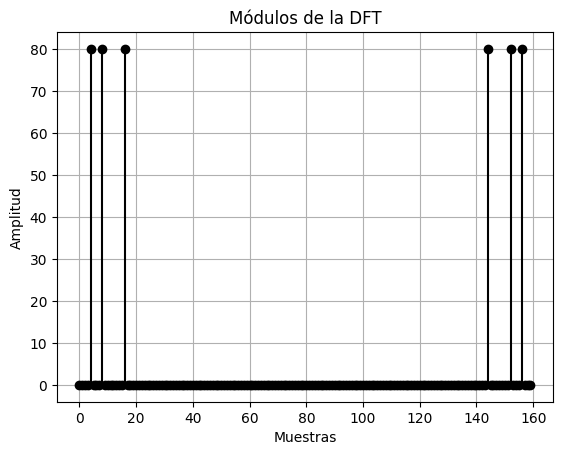

In [ ]:
X = np.fft.fft(x)
plt.stem(abs(X), linefmt='black', markerfmt='black', basefmt='black')
plt.title('Módulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

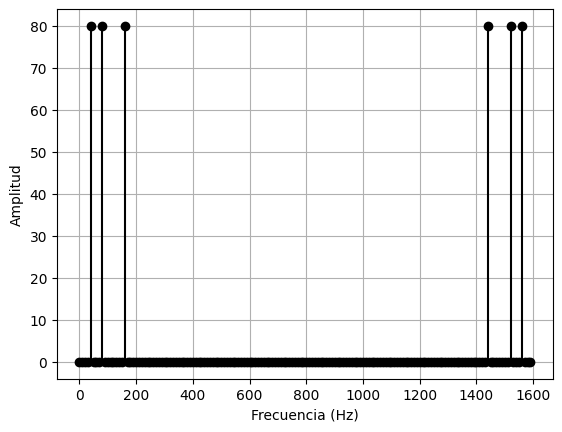

In [ ]:
N = len(X)
F = np.arange(0,N)*Fs/N
plt.stem(F,abs(X), linefmt='black', markerfmt='black', basefmt='black')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

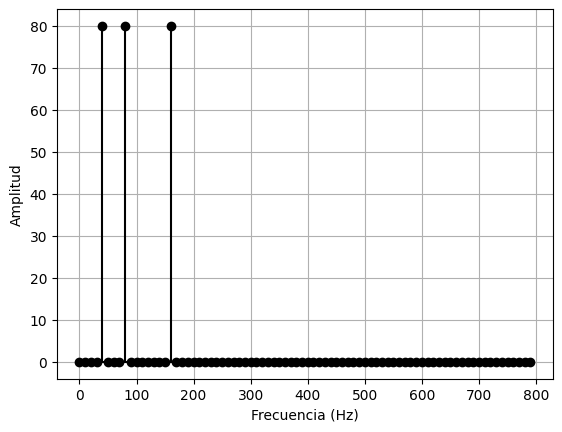

In [ ]:
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
Xmitad = X[0:Nmitad]
plt.stem(Fmitad,abs(Xmitad), linefmt='black', markerfmt='black', basefmt='black')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.grid(True)
plt.show()

## Punto 4.3
---
Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior. (10%)



La función que realiza el cálculo de la transformada inversa corresponde a la librería **Numpy**.

`fft.ifft(a, n=None, axis=-1, norm=None, out=None)`

**Parámetros:**

`a` *(array_like):* Entrada que representa la señal en el dominio de la frecuencia. Debe ser un array complejo (o convertible a complejo).

`n` *(int, opcional):* Longitud de la transformada inversa. Si se especifica y es mayor que la longitud de `a`, se rellenan ceros al final.Si es menor, se trunca `a`.

`axis` *(int, opcional):* Eje sobre el que se calcula la IFFT. Por defecto es el último eje (-1).

`norm` *({None, "ortho"}, opcional):* Tipo de normalización, por defecto None (la IFFT no está normalizada). "ortho": usa normalización ortonormal.

**Salida:**

`out` *(ndarray de números complejos):* Devuelve la transformada inversa discreta de Fourier de `a`. El resultado está en el dominio del tiempo y es de tipo complejo incluso si la entrada es real.[2]


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


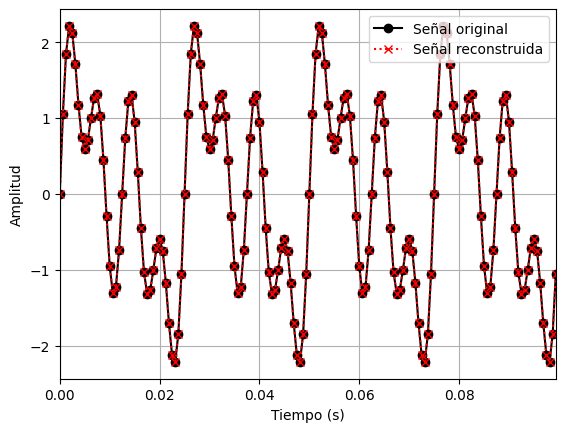

In [ ]:
x_inv = np.fft.ifft(X)
plt.plot(t, x, marker='o', color='black', label='Señal original')
plt.plot(t, x_inv, marker='x', color='red', label='Señal reconstruida', linestyle='dotted')
plt.xlim(0, np.max(t))
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

## Punto 4.4
---
¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué? (10%)

```
F1 = np.fft.fft(x);
F2 = np.zeros((len(F1)));
F2[9:13] = F1[9:13];
xr = np.fft.ifft(F2);

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()
```




Extraiga de manera similar cada una de las componentes de la señal.

Sí, es un filtro pasa bandas, en primer lugar se calcula la transformada rapida de Fourier, luego se crea un arreglo de ceros del mismo tamaño que la señal con esto se realiza el filtro de   que permite pasar solo un rango específico de frecuencias y elimina el resto en este caso se preservan solo las componentes espectrales entre los índices 9 y 12, se logra estableciendo en cero los coeficientes de Fourier fuera de dicho rango, por ultimo se recostruye la señal usando la tranformada inversa de Fourier.

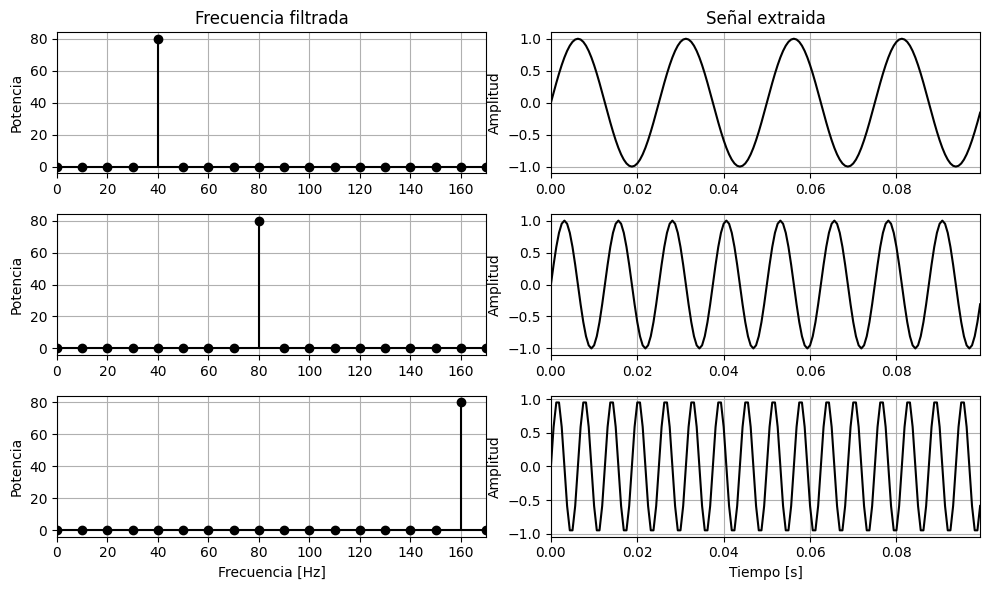

In [ ]:
N = len(X)

# Índices correspondientes a 40 Hz, 80 Hz y 160 Hz
idx_40 = int(np.round(40 * N / Fs))
idx_80 = int(np.round(80 * N / Fs))
idx_160 = int(np.round(160 * N / Fs))

# Crear espectros vacíos para cada componente
Xfilt_40 = np.zeros(N, dtype=complex)
Xfilt_80 = np.zeros(N, dtype=complex)
Xfilt_160 = np.zeros(N, dtype=complex)

# Copiar la frecuencia positiva y su conjugado simétrico
Xfilt_40[idx_40] = X[idx_40]
Xfilt_40[-idx_40] = np.conj(X[idx_40])

Xfilt_80[idx_80] = X[idx_80]
Xfilt_80[-idx_80] = np.conj(X[idx_80])

Xfilt_160[idx_160] = X[idx_160]
Xfilt_160[-idx_160] = np.conj(X[idx_160])

# Transformada inversa para obtener las señales en el dominio del tiempo
senal_40 = np.fft.ifft(Xfilt_40).real
senal_80 = np.fft.ifft(Xfilt_80).real
senal_160 = np.fft.ifft(Xfilt_160).real

# Graficar las señales reconstruidas
plt.figure(figsize=(10, 6))

plt.subplot(3, 2, 1)
plt.stem(Fmitad, abs(Xfilt_40[:N//2]),
        linefmt='black', markerfmt='ko', basefmt='black')
plt.title('Frecuencia filtrada')
plt.ylabel("Potencia")
plt.xlim(0, 170)
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(t, senal_40, color='black')
plt.title('Señal extraida')
plt.ylabel("Amplitud")
plt.xlim(0, np.max(t))
plt.grid(True)

plt.subplot(3, 2, 3)
plt.stem(Fmitad, abs(Xfilt_80[:N//2]),
        linefmt='black', markerfmt='ko', basefmt='black')
plt.ylabel("Potencia")
plt.xlim(0, 170)
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(t, senal_80, color='black')
plt.ylabel("Amplitud")
plt.xlim(0, np.max(t))
plt.grid(True)

plt.subplot(3, 2, 5)
plt.stem(Fmitad, abs(Xfilt_160[:N//2]),
        linefmt='black', markerfmt='ko', basefmt='black')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia")
plt.xlim(0, 170)
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(t, senal_160, color='black')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.xlim(0, np.max(t))
plt.grid(True)

plt.tight_layout()
plt.show()

## Punto 4.5
---
El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja) (25%).

Saving senecg.mat to senecg.mat


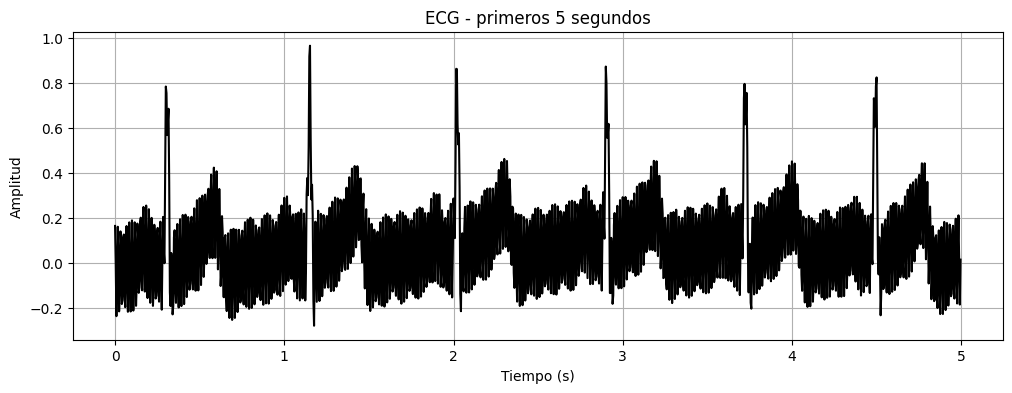

In [ ]:
from google.colab import files
uploaded = files.upload()

import scipy.io
import numpy as np
import matplotlib.pyplot as plt

data = scipy.io.loadmat('senecg.mat')
ecg = data['ECG'].flatten()

Fs = 250
t = np.arange(len(ecg)) / Fs

plt.figure(figsize=(12, 4))
plt.plot(t[:Fs*5], ecg[:Fs*5], color='black')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("ECG - primeros 5 segundos")
plt.grid(True)
plt.show()

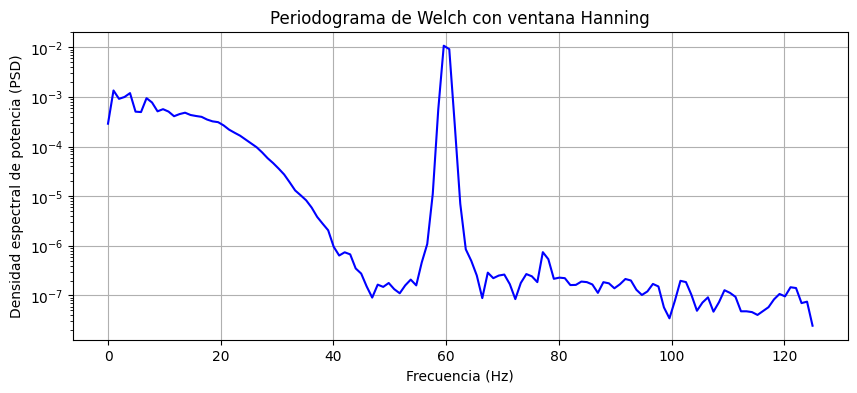

In [ ]:
# Calcular el periodograma de Welch con ventana Hanning
frecuencia, psd = welch(ecg, fs=Fs, window='hann', nperseg=256, noverlap=128)

# Graficar el espectro
plt.figure(figsize=(10, 4))
plt.semilogy(frecuencia, psd, color='blue')
plt.title("Periodograma de Welch con ventana Hanning")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia (PSD)")
plt.grid(True)
plt.show()


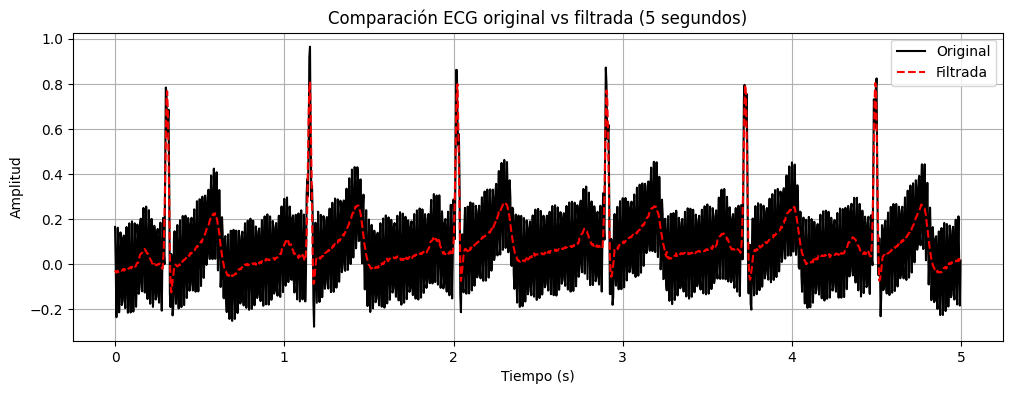

In [ ]:
# FFT de la señal original
X = np.fft.fft(ecg)
N = len(X)
frequencias_fft = np.fft.fftfreq(N, d=1/Fs)

X_filtrado = X.copy()

margen = 1
mascara_ruido = (np.abs(frequencias_fft - 60) < margen) | (np.abs(frequencias_fft + 60) < margen)
X_filtrado[mascara_ruido] = 0

# Transformada inversa para obtener la señal filtrada
ecg_filtrado = np.fft.ifft(X_filtrado).real

plt.figure(figsize=(12, 4))
plt.plot(t[:Fs*5], ecg[:Fs*5], label='Original', color='black')
plt.plot(t[:Fs*5], ecg_filtrado[:Fs*5], label='Filtrada', color='red', linestyle='--')
plt.title("Comparación ECG original vs filtrada (5 segundos)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()



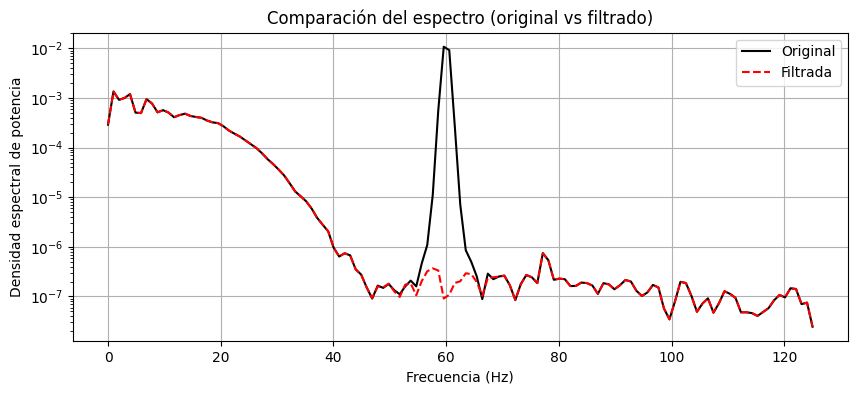

In [ ]:
frecuencia_filtrada, psd_filtrada = welch(ecg_filtrado, fs=Fs, window='hann', nperseg=256, noverlap=128)

plt.figure(figsize=(10, 4))
plt.semilogy(frecuencia, psd, label='Original', color='black')
plt.semilogy(frecuencia_filtrada, psd_filtrada, label='Filtrada', color='red', linestyle='--')
plt.title("Comparación del espectro (original vs filtrado)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia")
plt.legend()
plt.grid(True)
plt.show()


https://www-sciencedirect-com.udea.lookproxy.com/science/article/pii/S2950435X24000143

Se eligió una ventana de 256 muestras (equivalente a aproximadamente 1 segundo de señal con Fs = 250 Hz) porque permite capturar una porción temporal suficiente para incluir varios ciclos cardíacos en una ventana (ritmo ≈ 1 Hz). Esto permite preservar la forma espectral del ECG sin perder resolución temporal.

El solapamiento fue del 50% (128 muestras), una elección común en análisis de señales biológicas, ya que reduce la varianza de la estimación al promediar más ventanas sin aumentar el número total de muestras. Esta técnica mejora la estabilidad del espectro estimado, especialmente en señales ruidosas como el ECG [3].

## Punto 4.6

---

 Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen losperiodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y elancho de la ventaja) (25%)


In [ ]:
from google.colab import files
uploaded = files.upload()
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Cargar datos
control = loadmat('C045_EP_reposo.mat')  # EEG sano
parkinson = loadmat('P007_EP_reposo.mat')  # EEG Parkinson


print(control.keys())


Saving C045_EP_reposo.mat to C045_EP_reposo (1).mat
Saving P007_EP_reposo.mat to P007_EP_reposo (1).mat
dict_keys(['__header__', '__version__', '__globals__', 'data'])


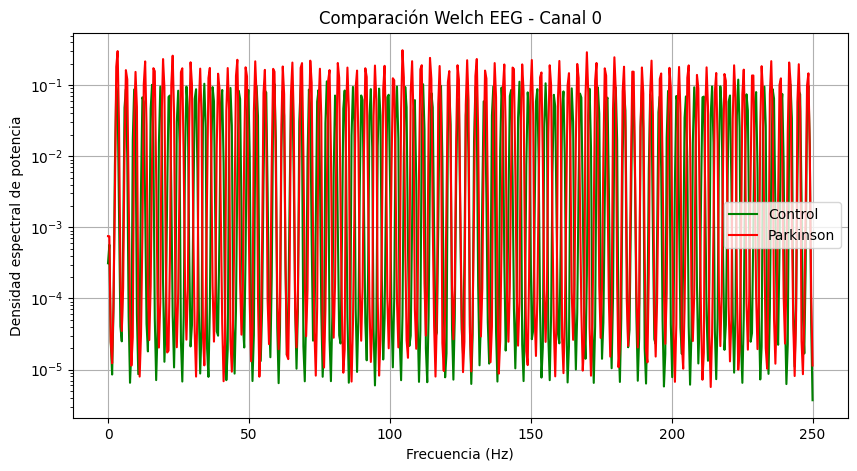

In [ ]:
eeg_control = control['data']  # shape: (8, 2000, 161)
eeg_parkinson = parkinson['data']

canal = 0

control_signal = eeg_control[canal, :, :].flatten()
parkinson_signal = eeg_parkinson[canal, :, :].flatten()
Fs = 500
nperseg = 1024
noverlap = 512

f_c, psd_c = welch(control_signal, fs=Fs, window='hann', nperseg=nperseg, noverlap=noverlap)
f_p, psd_p = welch(parkinson_signal, fs=Fs, window='hann', nperseg=nperseg, noverlap=noverlap)
plt.figure(figsize=(10, 5))
plt.semilogy(f_c, psd_c, label='Control', color='green')
plt.semilogy(f_p, psd_p, label='Parkinson', color='red')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Comparación Welch EEG - Canal 0')
plt.legend()
plt.grid(True)
plt.show()

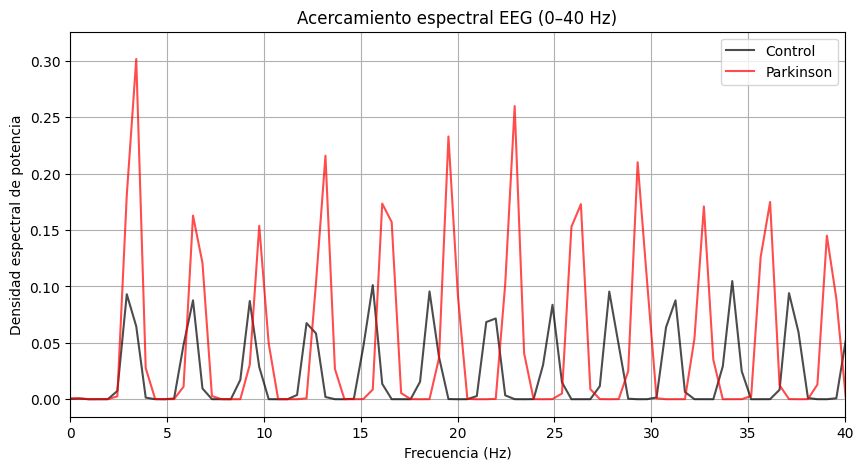

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(f_c, psd_c, label='Control', color='black', alpha=0.7)
plt.plot(f_p, psd_p, label='Parkinson', color='red', alpha=0.7)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia")
plt.title("Acercamiento espectral EEG (0–40 Hz)")
plt.legend()
plt.grid(True)
plt.xlim(0, 40)
plt.show()

La ventana Hanning reduce significativamente la fuga espectral, permitiendo una mejor resolución de componentes cercanos en frecuencia. Por su parte, el solapamiento del 50% permite mejorar la suavidad del espectro estimado al incrementar el número de promedios, sin comprometer la resolución en frecuencia ni aumentar el ruido.

Estos parámetros resultaron adecuados para las señales EEG y ECG utilizadas, tanto sintéticas como reales, proporcionando espectros informativos y consistentes [4].

## **Conclusiones:**

* La transformación inversa (IFFT) permitió obtener una señal en el
dominio del tiempo a partir de un espectro filtrado, comprobando que el procedimiento y los parámetros fueron correctos y que los resultados son coherentes con el comportamiento esperado.

* Visualmente, la señal filtrada muestra una forma más suave, sin las oscilaciones rápidas o irregularidades propias del ruido. Esta limpieza en el dominio temporal es importante para una interpretación  más confiable, especialmente cuando se analizan bioseñales.

* El uso de ventanas en el análisis de señales, como la ventana de Hanning aplicada en esta práctica, es fundamental para mejorar la precisión del análisis espectral. Al reducir los efectos de discontinuidad en los extremos de los segmentos, permiten obtener una representación más clara y estable del contenido en frecuencia de señales fisiológicas como el ECG. Su correcta elección mejora la resolución y estabilidad, mejorando significativamente la calidad del procesamiento de bioseñales.

## **Referencias**
[1]Siemens Simcenter. (2020, agosto 29). Digital Signal Processing: Sampling Rates, Bandwidth, Spectral Lines, and more. Siemens Community. https://community.sw.siemens.com/s/article/digital-signal-processing-sampling-rates-bandwidth-spectral-lines-and-more

[2]NumPy Developers. (2024). numpy.fft.ifft — NumPy v2.2 Manual. NumPy. https://numpy.org/doc/2.2/reference/generated/numpy.fft.ifft.html

[3] Morais, E., Queiroz, D. M., Garcia, A. R., Silva, D. C., & Silva, D. G. (2024). Use of digital signal processing and machine learning to classify electrocardiographic signals obtained with dry electrodes. Smart Health https://www-sciencedirect-com.udea.lookproxy.com/science/article/pii/S2950435X24000143

[4] D. J. Hernández-González, I. Flores-Cruz, and J. A. Hernández-González, "Detección de señales EEG epilépticas utilizando redes convolucionales basada en la transformada synchrosqueezing acolchadas, vol. 25, no. 2, pp. 269–278, 2021. [Online]. Available: https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1405-55462021000200269